# Algorithms and Data Structures Practice

### Includes extension material

# Prerequisites

- Full knowledge of required IB material on topics 4-5
- Courage to ask questions
- Some thoughts on the challenges in the end of homeworks (and preferably complete homeworks as well)

The slides will be available on https://maleksware.github.io/stuff-place/y11-algo.

Overlapping material similar to Mr Nam's lessons (but with sometimes different takes) will also be there.

# Directions of thought

0. ???
1. Algorithm complexity analysis revisited
    - Tips and tricks
    - Practice problems
    - Amortisation
2. Array algorithms revisited
    - Exam recommendations
    - Resizing arrays

3. Advanced data structures
    - 2D arrays
        - Diagonals
        - Cache
    - Stacks
        - VBS
    - Queues
        - Implementation with stacks
    - Linked lists
        - No comment
    - Trees
        - Tips and tricks
4. Recursion
    - Binary search revisited
    - Synthesising VBSs

# 0. Asserting dominance

(over an IB problem)

Remember the problem about filling an array in a spiral-like way?

In [ ]:
n = int(input())

s = [[-1] * n for i in range(n)]

for r in range((n + 1) // 2):
    c1 = 4 * n * r - 4 * r * r + 1
    c2 = c1 + 2 * (n - 2 * r - 1)

    s[r][r] = c1
    s[n - r - 1][n - r - 1] = c2

    for i in range(1, n - 2 * r):
        s[r][r + i] = c1 + i
        s[n - (r + i) - 1][n - r - 1] = c2 - i
        s[r + i][r] = c2 + 2 * (n - 2 * r - 1) - i
        s[n - r - 1][n - (r + i) - 1] = c2 + i

for c in s:
    print(" ".join((f"{i:02d}" for i in c)))

# Complexity analysis

### What the IB cares about

- Very basic knowledge of Big O
- Useful in IAs to cover Criterion C
- Identify/outline/state questions (associate complexities with algorithms)

# Big O notation

### How do we measure code performance?

### What about algorithms?

- Timing works for particular hardware/implementation, bad for algorithms
- Number of operations is better but hard to measure (and different operations take a different amount of time)

# Scaling

Big O measures how the number of operations (and time to execute the algorithm implementation) **scales** with the size of input in the **worst case**.

$n$ indicates a measurable size of input (length of an array that is put in the algorithm, number of vertices in the graph, etc).

The expression inside of big O indicates what the execution time is proportional to (the trend towards very big input sizes).

$O(n)$ means that the execution time grows linearly when the input size is increased. If the input size is doubled, the execution time is doubled as well (because the output time is proportional to $n$).

What about $O(n^2)$?



$O(n^2)$ means that if the input is doubled, the number of operations quadruples.

# Other common complexities

- $O(1)$ - *constant time operations*. This means their execution time does not depend on the input size. Accessing an array (not LinkedList) element or performing arithmetic counts as such.
- $O(n)$ - linear. Examples - removing an array element or calculating the mean of a number array.
- $O(n^2)$ - quadratic. Examples - insertion/selection sort, iterating over pairs.
- $O(\log{n})$ - logarithmic (base 2). Example - binary search in a sorted array.
- $O(n \log{n})$ - complexity of most Divide and Conquer algorithms (merge sort, quick sort). **Not assessed.** Not knowing what Divide and Conquer means is fine.

For all complexities, state what happens to the number of iterations (or operations) if the size of input is quadrupled.

# Time complexity vs space complexity

All complexities can also relate to the memory blueprint (number of primitively typed entities stored as opposed to the number of simple operations). The TC and SC are not always the same: consider making $n$ calculations in a loop, the memory used is $O(1)$ but the TC is $O(n)$.

# Determining algorithm complexities

Get ready to propose ideas and make mistakes - some of the examples are tricky!

Identifying complexities from code is **not assessed** but extremely helpful to be able to do.

Remember the following tips:

1. Arithmetic operators, accessing array elements and printing (small) data are $O(1)$.
2. Powers of $n$ come from nested loops with $n$.
3. Logarithms are unlikely to show up in the exam at all. But if they do, look for bisections and binary search.

In the following examples, consider $n$ to be the length of the iterable (list, array or string) if it's not explicitly stated.

In [ ]:
# Example 1

s = input()

print("Hello World!")
a = 1
b = 2

$O(1)$ (if you don't account for the time it takes to execute the data input, in which case it's $O(n)$ where $n$ is the buffer size).

In [ ]:
# Example 2

s = [int(i) for i in input().split()] # reads an array of space-separated integers

count = len(s) # Bonus marks if you state the complexity of this function
element_sum = 0

for i in s: # go over all elements of s
    element_sum += i

print(element_sum / count)

$O(n)$. A single loop over $n$ elements.

In [ ]:
# Example 3

s = [int(i) for i in input().split()]

inversions = 0

for i in range(len(s)):
    for j in range(len(s)):
        if i < j and s[i] > s[j]:
            inversions += 1
            
print(inversions)

$O(n^2)$. Each of $n$ iterations of the first loop results in $n$ iterations of the second, getting us $n \cdot n = O(n^2)$.

In [ ]:
# Example 4

s = input() # reads a string

for i in range(42):
    for j in s:
        # iterates over all characters of s
        if j == "w":
            print("W")

$O(n)$. Remember that big O is a measure of *scaling*, meaning that **all constants are omitted**. We only care about the general law of scaling, not its particular aspects such as constants.

Well... kinda. The rule to ignore constants comes from the definition of big O which accounts for all constant factors.

In [ ]:
# Example 5

s = [int(i) for i in input().split()]

inversions = 0

for i in range(len(s) - 1):
    for j in range(i + 1, len(s)):
        if s[i] > s[j]:
            inversions += 1
            
print(inversions)

Left as an exercise for the reader

Just kidding, this one is also $O(n^2)$ - future Alex, please show this on the board

In [ ]:
# Example 6

s = [int(i) for i in input().split()]
el_count = 0

for i in range(len(s)):
    for j in range(len(s)):
        for k in range(len(s)):
            el_count += (s[i] + s[j] + s[k])

for i in range(len(s)):
    for j in range(len(s)):
        el_count -= (s[i] + s[j])
        
print(el_count)

$O(n^3)$. Yes, it is $O(n^3 + n^2)$, but for very large $n$ the $n^2$ term becomes insignificant (remember that we care about the trend towards large inputs).

However, there is nothing wrong in including all terms particularly if it's not obvious which one "wins".

In [ ]:
# Example 7

a = [int(i) for i in input().split()]
b = [int(j) for j in input().split()]

n = len(a)
m = len(b)

eq_pairs = 0

for i in range(n):
    for j in range(m):
        if a[i] == b[j]:
            eq_pairs += 1

print(eq_pairs)

$O(nm)$. Two variables are OK, if both of them denote some *independent* size of input!

**NB**: Look for features in the code that need to examine all elements - for example, using `sum(s)` to count the    sum of elements introduces a $O(n)$ factor, even though we can't see a loop. 

In [ ]:
# Example 8

a = [int(i) for i in input().split()]

n = len(a)
k = sum(a) # returns the sum of all elements

some_val = 0
for i in range(n):
    some_val += (a[i] / (n + 2 * i - len(a)))

print(counter + k)

$O(1)$.

# Extension: amortisation

Useful for later stuff.

How do resizeable but linear data structures work (e.g. lists in Python or ArrayLists in Java)?

They all have the same complexity for adding to and removing from the end: $O(1)$ per operation.

- Start with an empty array
- When it's full, allocate memory for twice the size
- Move all present elements to the new location
- Add the element you need

How is this still $O(1)$ *per operation*?

# Array algorithms revisited

### Improving performance of searches

Early exit: if the element is found, quit the loop.

**NB**: Do **not** use `break` in Paper 1. Use a `while` loop with a flag instead:

In [ ]:
s = [1, 4, 3, 2, 8, 3]

found = False
index = 0

while index < len(s) and not found:
    if s[index] == 3:
        print(f"Found at index {index}")
        found = True
    index += 1

Bonus question: what is the time complexity *with early exit*?

Still $O(n)$. Early exits are a *heuristic*, meaning they improve practical performance in some cases without changing the worst case time complexity.

# Bubble sort

- Time complexity: $O(n^2)$
- Slow but famous

$n$ iterations, on each iteration adjacent elements are compared starting from the first one and swapped if needed.

Implementation details: if a `swap` function is provided, use it, otherwise swap with a temporary variable.

In [ ]:
s = [2, 3, 8, 1, -2, 4, -3, 7, 0, 12]
num_of_iterations = 0

for iteration in range(len(s)):
    for i in range(len(s) - 1):
        num_of_iterations += 1
        if s[i] > s[i + 1]:
            tmp = s[i]
            s[i] = s[i + 1]
            s[i + 1] = tmp

print(s)
print(num_of_iterations)

# Improving performance

**NB**: remember these 2 points for the exam! You can get 4 marks with those.

1. Reducing the number of iterations

Note that the last `iteration` elements of the array are fixed. Let's not look at them at all!

Again, this does not change time complexity (remember example 5)

In [ ]:
s = [2, 3, 8, 1, -2, 4, -3, 7, 0, 12]
num_of_iterations = 0

for iteration in range(len(s)):
    for i in range(len(s) - 1 - iteration):
        num_of_iterations += 1
        if s[i] > s[i + 1]:
            tmp = s[i]
            s[i] = s[i + 1]
            s[i + 1] = tmp

print(s)
print(num_of_iterations)

2. Early exit if no swaps are made

If a list is almost sorted, this will make the algorithm terminate more quickly. Still won't help in the worst case though!

In [ ]:
s = [2, 3, 8, 1, -2, 4, -3, 7, 0, 12]
num_of_iterations = 0
swap_made = True
iteration = 0

while iteration < len(s) and swap_made:
    swap_made = False
    for i in range(len(s) - 1 - iteration):
        num_of_iterations += 1
        if s[i] > s[i + 1]:
            swap_made = True
            tmp = s[i]
            s[i] = s[i + 1]
            s[i + 1] = tmp
    iteration += 1

print(s)
print(num_of_iterations)

# Bubble vs selection

Exam type of question: distinguish between the two

- Bubble can terminate early
- Bubble works better on arrays that are almost sorted
- Selection does less swaps (one per iteration)
- Both work in $O(n^2)$

# Binary search

- Only on sorted arrays
- $O(\log{n})$
- Gotta remember how it's written
- Fast

# How it works

Easy to think about in terms of a *monotonous function* (see the board).

1. Establish a range where you expect the answer to be
2. Pick its midpoint
3. If you've overshot it, everything past it is redundant - shrink
4. Shrink the other side otherwise
5. Repeat until you hit what you need

There are 2 understandable implementations:
1. The good one with educational value
2. The IB one

And 2 common approaches:
1. Iterative
2. Recursive

Both can be on exams.

The most common thing on the exam is to use binary search to locate an element in a sorted array. Note the equivalence with the "function" way of thinking about it.

In [ ]:
# Good implementation
s = [1, 2, 5, 8, 18, 42, 228]

k = 300 # want to get the index at which this element would've been inserted into s

# Invariant: s[l] < k, s[r] >= k

l = -1 # set both to out of bounds
r = len(s)

while r - l > 1: # end when they touch, marking the critical condition
    mid = (r + l) // 2
    if s[mid] < k:
        l = mid
    else:
        r = mid
        
print(r) # where is the answer?

In [ ]:
# IB implementation (USE THIS ONE WHEN YOU SIT THE EXAM!!!)

s = [1, 2, 5, 8, 18, 42, 228]

k = 18

l = 0 # in bounds!
r = len(s) - 1

found = False
index = -1

while l <= r and not found: # end when they overlap so we can detect if we found the element
    mid = (r + l) // 2
    if s[mid] == k:
        found = True
        index = mid
    elif s[mid] < k:
        l = mid + 1
    else:
        r = mid - 1

if found:
    print(index)
else:
    print("Not found")
        

# Recursive implementation

- Never seen on exams before, but was on Y12 trials
- Do the same thing, pass the boundaries as function parameters and return the result to the parent caller function
- If you don't know what this slide is about don't worry (recursion is coming later)

# Analysing complexity

Where is the $\log$ factor coming from?

What happens if the input size is doubled?

# Advanced data types (ADTs)

Also known as data structures (not to be confused with collections)

### 2D arrays

Access elements by row index, then by column index:

In [ ]:
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
]

n = 4
m = 3

for i in range(n):
    for j in range(m):
        print(matrix[i][j])
    print()

In [ ]:
# Diagonal traversal
# Note that for any diagonal either the sum of coordinates or their difference is constant
# (depending on the direction of the diagonal)

matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15],
]

n = len(matrix)
m = len(matrix[0])

for inv in range(-m + 1, n):
    for i in range(n):
        # inv = i - j
        j = i - inv
        if 0 <= j < m:
            print(matrix[i][j], end=" ")
    print()


# Bonus content

1. State the time complexity of each snippet

2. State which one will run faster in practice

### Snippet 1

```java
for (int i = 0; i < n; i++) {
    for (int j = 0; j < m; j++) {
        element_sum += s[i][j]; 
    }
}
```

### Snippet 2

```java
for (int j = 0; j < m; j++) {
    for (int i = 0; i < n; i++) {
        element_sum += s[i][j]; 
    }
}
```

$O(n)$ for both but Snippet 2 is ~150-300x slower on big data (measured on C++) because of cache misses

# More magic (offtop)

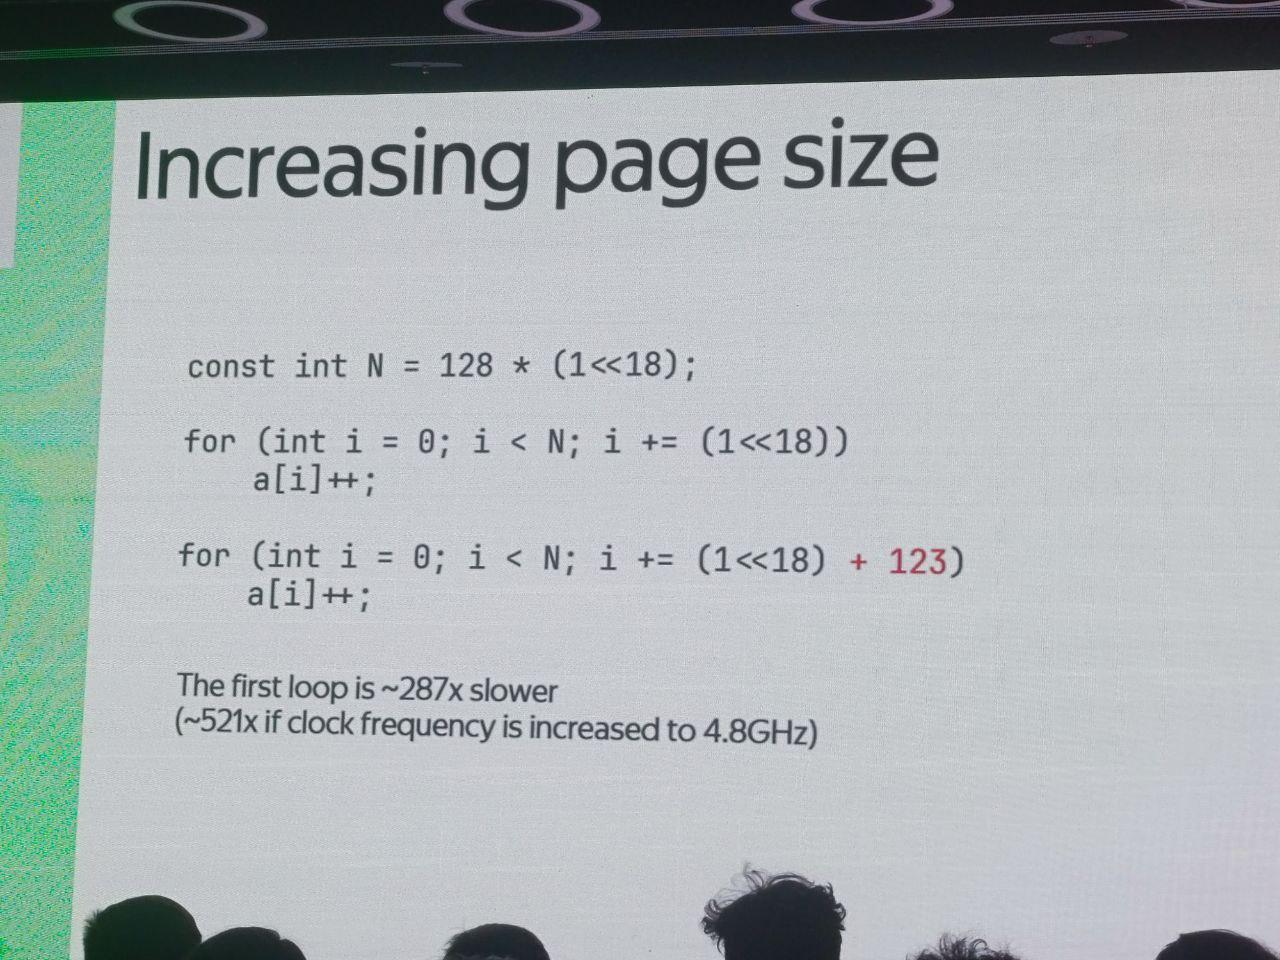

# Stacks

### For the exam

- Application of stacks: parsing, call stack (for functions), recursion, depth first search (DFS), undo/redo
- You will be explicitly told to use a stack in Paper 1 implementations
- Downsides of the stack: unability to read/remove from the middle, need to go over all elements and remove them to linearly search
- Use common sense to deduce advantages/disadvantages (why is a stack bad as a restaurant order processing ADT?)

How do we check if a sequence is a Valid Bracket Sequence (VBS)?

# Queues
    
### For the exam

- Application of queues: print queue, processor job queue, buffers, server request queue, breadth-first search (BFS)
- Use the methods described here (I probably lost marks on Paper 1 because I forgot their names)
- Benefits of the queue: it keeps the order, allows to process requests on first-to-come basis
- Downsides of the queue: hard linear search, can't randomly access elements, takes up more space than needed if implemented on an array

Remember that although the methods' names can be read as `nq` and `dq`, both of them have 7 letters each. Play it safe kids, you got plenty o'time.


# Implementing a queue using two stacks

Remember to keep the time complexity $O(1)$ per operation!

In [ ]:
stack_in = []
stack_out = []

In [ ]:
def enqueue(x):
    stack_in.append(x)

def dequeue():
    if not stack_out: # if stack_out is empty
        # move everything from stack_in in LIFO order to the stack_out
        while stack_in:
            stack_out.append(stack_in.pop())
    
    return stack_out.pop()

def peek():
    if not stack_out: # if stack_out is empty
        # move everything from stack_in in LIFO order to the stack_out
        while stack_in:
            stack_out.append(stack_in.pop())
    
    return stack_out[-1]

def isEmpty():
    return not (stack_in or stack_out) # if both are empty, return true

In [ ]:
enqueue(32)
enqueue(42)

print(peek())
print(dequeue())
print(isEmpty())

enqueue(20)
dequeue()

print(dequeue())
print(isEmpty())


# Why this is $O(1)$

Because each item enters and leaves each stack exactly once, meaning that even though "refilling" happens, the total number of "refilled" elements adds up to $n$. This means that $n$ individual moves during refilling per $n$ operations give us **amortised** $O(1)$ per operation.

# Test your understanding

State the time complexities of all methods of 2D arrays, stacks and queues.

# Linked lists

- Nodes scattered around memory and pointing to each other in order
- Can be singly linked, doubly linked and circular
- Are a dynamic data structure
- Don't allow access by index (slow search)
- Easy to add, remove or insert elements ($O(1)$ per operation)
- Methods are **not explicitly assessed**, refer to JETS for Java syntax

###  For the exam

- Application of linked lists: mutable arrays, moves in the game (chess) where you don't have to jump between non-consecutive moves that often. **Should not be assessed but was asked in N24 exams**, be prepared to make stuff up.
- Understand the structure of each (see the board)
- Remember the `head` and `tail` pointers
- Check that you can describe insertion/deletion operations (see the board)


# Trees

- Arguably the best thing IB CompSci has
- Can be seen as a linked list with branching (and without merging)
- Are a dynamic data structure
- Have no single order of processing (wait for it)
- Methods are **not assessed** but you are required to have a visual understanding of them

### Elements of a tree

- Nodes (vertices)
- Pointers to child nodes from parent nodes
- A single root node (**IB-specific!**)
- Leaves (nodes without children)
- Subtrees

### Binary trees

- Each node has at most 2 children (left and right, order matters)
- Are extremely useful for storing ordered data
- The left subtree has elements smaller than the parent node, the right one has the larger ones
- You traverse and pick the path you want

Exam tip: when asked to add the items to the binary tree, do it in order in which they appear, follow the smaller/greater path and just make sure that each of them ends up as a leaf on the current step.

### Tree traversals

1. Preorder (root -> left st -> right st)
2. Inorder (left st -> root -> right st)
3. Postorder (left st -> right st -> root)

Collecting flags!

Question: which one outputs the elements of the tree in ascending order?

Question: how would you implement those traversals?

# Recursion

Definition: situation when a function calls itself.

Useful for traversals and problem decomposition.

Adapted quote: "\[recursion] is when we have a big problem that we don't know how to solve, and we break it down into smaller problems that we also don't know how to solve"


In [ ]:
def factorial(x):
    if x <= 0:
        return 1
    else:  
        return x * factorial(x - 1)

print(factorial(5))

### Constructing a recursive function

1. Parameters
2. Base case (base condition) - do by hand
3. Recursive case (reduce to some simpler cases)

What about Fibonacci numbers?

In [ ]:
def fib(x): # fib(0) = 1, fib(1) = 1, fib(2) = 2
    if x < 2:
        return 1
    else:
        return fib(x - 1) + fib(x - 2)

for i in range(10):
    print(fib(i))

### Downsides of recursion

- Slower (function calls take time)
- Uses more memory on the stack than iterative approaches
- Needs memoisation to work efficiently
- Hard to debug

### Benefits of recursion

- More intuitive and abstract
- Easy to implement
- Elegant
- Uses an implicit stack (function call stack), hiding complexity from the programmer

In [ ]:
# State the output of this algorithm, showing all your working:

def f(x):
    if x % 3 == 0:
        return 0
    else:
        return f(x - 1) + 1
    
input() # ignore this line
print(f(5))

In [ ]:
import sys
sys.setrecursionlimit(1_000_000)

# State the output of this algorithm, showing all your working:

def f(x):
    if x < 3:
        return x
    return f(x - 2) + x + f(x - 3)

input() # ignore this line
print(f(6))

In [ ]:
# State the output of this algorithm, showing all your working:
# Bonus: figure out why this is useful

def f(a, b):
    if a % b == 0:
        return b
    return f(b, a % b)

input() # ignore this line
print(f(20, 12))

# Memoisation (improving recursive performance)

Values are deterministic - why not remember them to avoid calls to the whole call subtree?

Any ideas how to implement that?

i don't think it's assessed anyway...

# Traversing trees recursively (inorder)

1. Start at the root node
2. If the node is a leaf, add it to the output and return
3. Call the function from the left subtree
4. Add the current node to the output
5. Call the function from the right subtree
6. Return

# Extension: Synthesising VBSs

How can we use the material studied to generate all VBSs of length $2n$ for a given $n$?

How do we make them follow the alphabetical (lexicographical) order?

In [ ]:
def gen(stack, length, balance):
    # balance = #left - #right
    if length - len(stack) < balance or balance < 0:
        return

    if len(stack) == length:
        print(stack)
        return

    gen(stack + '(', length, balance + 1)
    gen(stack + ')', length, balance - 1)

n = int(input()) # number of one type of bracket
gen("", n * 2, 0)